In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# loading dataset of breast cancer
df = pd.read_csv(r"C:\Users\DEEPESH.G\Downloads\breast-cancer.csv")
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [37]:


# Drop rows with missing diagnosis and encode target
df_clean = df.dropna(subset=['diagnosis'])
df_clean['diagnosis'] = df_clean['diagnosis'].map({'M': 0, 'B': 1})

# Drop rows with missing features
df_clean = df_clean.dropna()

# Build feature matrix X and target vector y
X = df_clean.drop(columns=[col for col in ['id', 'diagnosis'] if col in df_clean.columns])
y = df_clean['diagnosis']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear SVM
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

# Train RBF SVM
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

# Evaluation
print("🔹 Linear SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

print("\n🔹 RBF Kernel SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

Feature matrix shape: (569, 30)
Target vector shape: (569,)
🔹 Linear SVM Results
Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  1]
 [ 2 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


🔹 RBF Kernel SVM Results
Accuracy: 0.9824561403508771
Confusion Matrix:
 [[41  1]
 [ 1 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



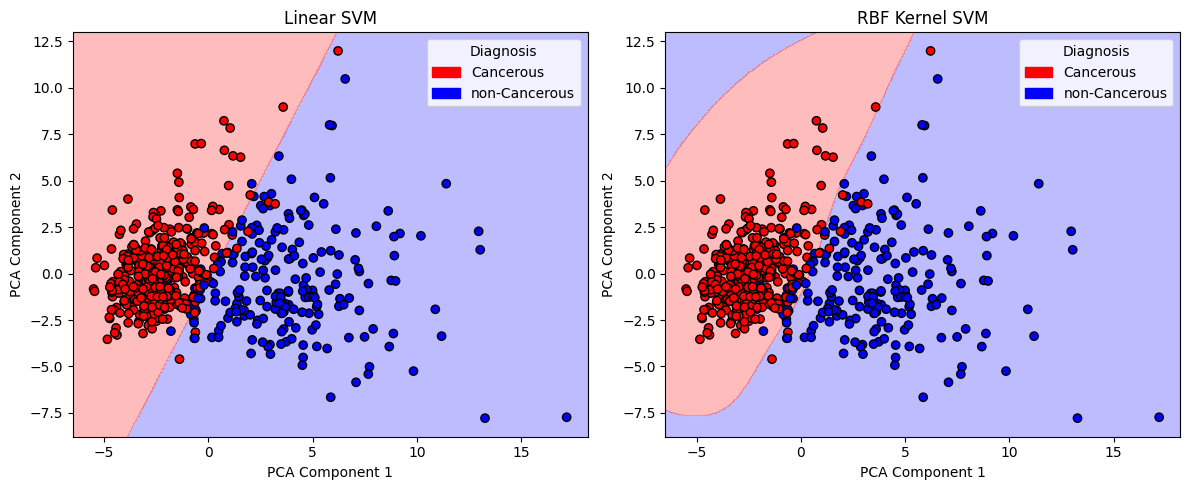

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA


df_clean = df.dropna(subset=['diagnosis'])
df_clean['diagnosis'] = df_clean['diagnosis'].map({'M': 0, 'B': 1})
df_clean = df_clean.dropna()

X = df_clean.drop(columns=[col for col in ['id', 'diagnosis'] if col in df_clean.columns])
y = df_clean['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_vis = pca.fit_transform(np.vstack((X_train_scaled, X_test_scaled)))
y_vis = np.hstack((y_train, y_test))

# Train models on full scaled data
linear_svm = SVC(kernel='linear', C=1)
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
linear_svm.fit(X_vis, y_vis)
rbf_svm.fit(X_vis, y_vis)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict on grid
Z_linear = linear_svm.predict(grid).reshape(xx.shape)
Z_rbf = rbf_svm.predict(grid).reshape(xx.shape)

# Plot
import matplotlib.patches as mpatches

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
titles = ['Linear SVM', 'RBF Kernel SVM']
Zs = [Z_linear, Z_rbf]

# Define custom legend labels
legend_labels = {
    0: 'Cancerous',
    1: 'non-Cancerous'
}
colors = ['red', 'blue']
patches = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(2)]

for ax, Z, title in zip(axes, Zs, titles):
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    scatter = ax.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap='bwr', edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    
    # Add custom legend
    ax.legend(handles=patches, title="Diagnosis")

plt.tight_layout()
plt.show()